In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL for the QS World University Rankings Wikipedia page
qs_rankings_url = "https://en.wikipedia.org/wiki/QS_World_University_Rankings"

# Send a GET request to the Wikipedia page
response = requests.get(qs_rankings_url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the university rankings based on class name
table = soup.find("table", class_="wikitable")

# Initialize empty lists to store data
names = []
ranks_2024 = []
ranks_2023 = []

# Iterate through rows in the table
for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")

    if len(columns) >= 3:
        name = columns[0].text.strip()
        rank_2024 = columns[1].text.strip()
        rank_2023 = columns[2].text.strip()

        names.append(name)
        ranks_2024.append(rank_2024)
        ranks_2023.append(rank_2023)

# Create a DataFrame using pandas
data = {"University Name": names, "2024 Ranking": ranks_2024, "2023 Ranking": ranks_2023}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
df.to_excel("qs_world_university_rankings.xlsx", index=False)

print("Data saved to qs_world_university_rankings.xlsx")


Data saved to qs_world_university_rankings.xlsx


In [2]:
import pandas as pd

# Read the Excel file into a DataFrame
input_excel_file = 'qs_world_university_rankings.xlsx'
df = pd.read_excel(input_excel_file)

# Dictionary to map university names to locations
location_dict = {
    "Massachusetts Institute of Technology (MIT)": "United States",
    "University of Cambridge": "United Kingdom",
    "University of Oxford": "United Kingdom",
    "Harvard University": "United States",
    "Stanford University": "United States",
    "Imperial College London": "United Kingdom",
    "ETH Zurich": "Switzerland",
    "National University of Singapore": "Singapore",
    "University College London": "United Kingdom",
    "University of California, Berkeley": "United States"
}

# Add a "Location" column to the DataFrame based on the location_dict
df["Location"] = df["University Name"].map(location_dict)

# Save the updated DataFrame back to the same Excel file
output_excel_file = 'qs_world_university_rankings_with_locations.xlsx'
df.to_excel(output_excel_file, index=False)

print(f"Data with locations saved to {output_excel_file}")


Data with locations saved to qs_world_university_rankings_with_locations.xlsx


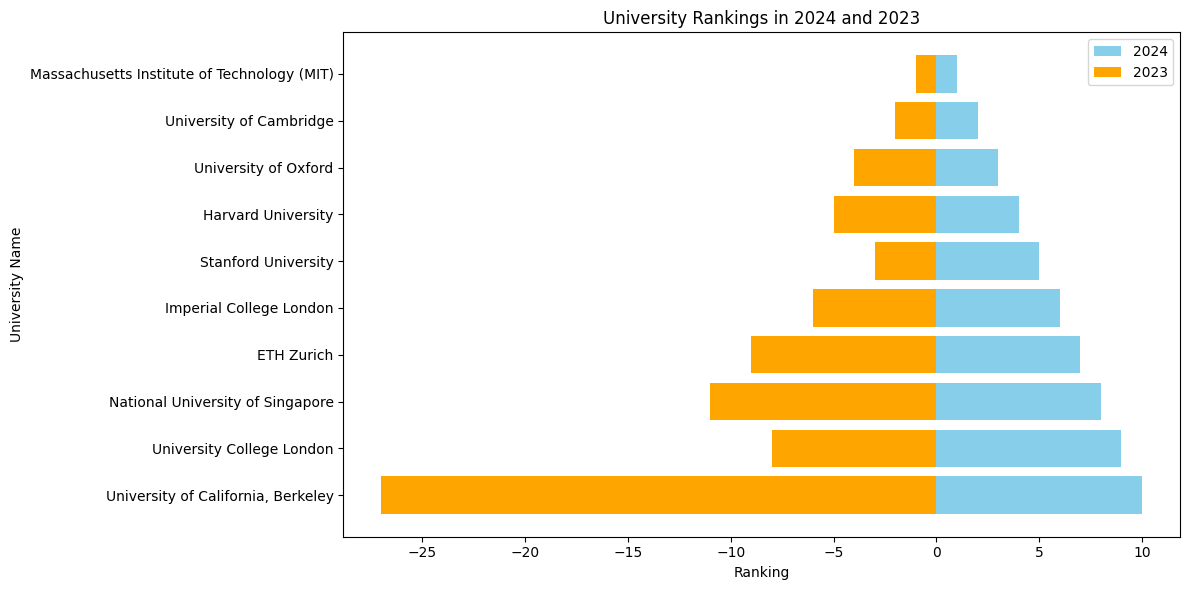

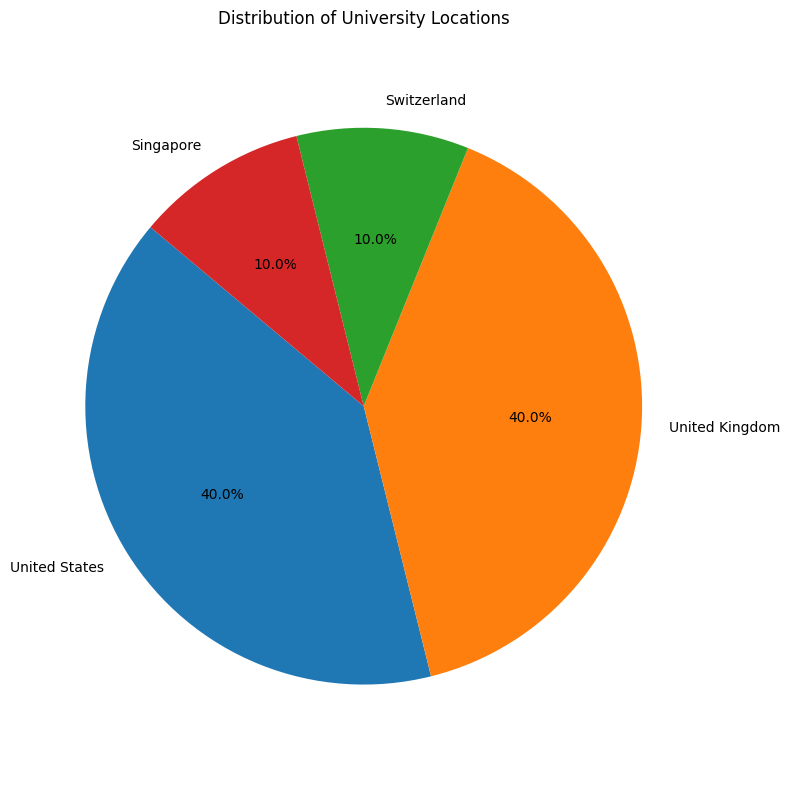

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the Excel file into a DataFrame
input_excel_file = 'qs_world_university_rankings_with_locations.xlsx'
df = pd.read_excel(input_excel_file)

# Sort the DataFrame by ranking
df_sorted = df.sort_values(by='2024 Ranking')

# Set up data for the plot
universities = df_sorted['University Name']
ranking_2024 = df_sorted['2024 Ranking']
ranking_2023 = df_sorted['2023 Ranking']
locations = df_sorted['Location']

# Bar Plot for Rankings in 2024 and 2023
plt.figure(figsize=(12, 6))
plt.barh(universities, ranking_2024, color='skyblue', label='2024')
plt.barh(universities, -ranking_2023, color='orange', label='2023')
plt.xlabel('Ranking')
plt.ylabel('University Name')
plt.title('University Rankings in 2024 and 2023')
plt.legend()

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to show higher rank at the top
plt.tight_layout()
plt.show()

# Pie Chart for University Locations
location_counts = locations.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of University Locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.tight_layout()
plt.show()

